In [251]:
import os

In [236]:
os.getcwd()

'/data/anaconda3'

In [160]:
#pip install -U imbalanced-learn
#pip install xgboost
#pip install pycaret
#pip install joblib
#pip install font-installer

In [55]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 
print (plt.rcParams['font.family'] )

['NanumGothic']


In [293]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import xgboost as xgb
import joblib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
plt.rc('font', family='NanumGothic') 
#print (plt.rcParams['font.family'] )
import pandas as pd
from tqdm import tqdm

In [294]:
data = pd.read_csv('./A측정소_기상자료(1hr)_2021년.csv', encoding='euc-kr')

data['일시'] = pd.to_datetime(data['일시'])
data['datetime'] = data['일시'].dt.strftime('%Y-%m-%d')
data['hour'] = data['일시'].dt.hour

data = data.loc[data['hour'] != 0]

In [253]:
df_A = pd.read_csv('A_data.csv')
del df_A['datetime']
df_A

,기온(°C)_1,기온(°C)_2,기온(°C)_3,기온(°C)_4,기온(°C)_5,기온(°C)_6,기온(°C)_7,기온(°C)_8,기온(°C)_9,기온(°C)_10,...,강수량(mm)_14,강수량(mm)_15,강수량(mm)_16,강수량(mm)_17,강수량(mm)_18,강수량(mm)_19,강수량(mm)_20,강수량(mm)_21,강수량(mm)_22,강수량(mm)_23
0,-8.7,-8.9,-9.5,-9.8,-10.0,-9.7,-10.4,-10.3,-9.1,-6.3,...,0.0,0.0,0.4,0.0,0.0,1.0,0.0,0.0,0.6,0.0
1,-4.5,-4.8,-4.4,-4.7,-5.4,-6.1,-7.4,-8.2,-8.0,-4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-7.5,-8.0,-7.2,-7.5,-8.0,-8.3,-9.1,-9.6,-9.1,-5.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-6.7,-7.5,-7.9,-8.5,-8.8,-9.0,-9.1,-8.8,-7.8,-5.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.8,-1.1,-1.0,-0.8,-0.6,-0.8,-1.7,-2.5,-2.6,-2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-9.2,-9.7,-10.2,-11.3,-11.9,-12.1,-12.3,-12.0,-10.8,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,-1.6,-2.4,-2.9,-3.2,-3.5,-3.6,-3.5,-3.3,-3.0,-2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,-3.3,-3.3,-2.5,-2.1,-2.4,-1.8,-1.7,-1.3,-0.5,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,1.2,0.8,0.6,-0.2,-0.9,-1.4,-1.9,-2.3,-2.2,-1.2,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0


In [255]:
def change(values):
    if values >= 1 :
        return 1
    else:
        return 0
data_A['발생건수'] = data_A['발생건수'].apply(change)
data_A['발생건수'].value_counts()

0    284
1     79
Name: 발생건수, dtype: int64

In [254]:
data_A = pd.read_csv('A_df.csv')
y_label = data_A['발생건수']

In [256]:
df_A['target'] = data_A['발생건수']

In [32]:
df_B = pd.read_csv('시간별_발생건수_B.csv')
del df_B['Unnamed: 0']
df_C = pd.read_csv('시간별_발생건수_C.csv')
del df_C['Unnamed: 0']
frame = [df_B,df_C]
df_BC=pd.concat(frame)
del df_BC['지역']
df_BC

,일시,기온(°C),습도(%),풍속(m/s),풍향(360°),일사량(w/㎡),PM10(㎍/㎥),PM2.5(㎍/㎥),오존(ppm),증기압(hPa),현지기압(hPa),지면온도(°C),30cm 지중온도(°C),강수량(mm),월,일,시,방향,발생건수
0,2021-01-01 1:00,-8.4,89.4,1.6,49.5,1.1,40.0,22.0,0.002,3.0,1018.9,-6.5,3.0,0.0,1,1,1,동풍,0.0
1,2021-01-01 2:00,-8.3,88.3,0.9,46.3,1.1,44.0,18.0,0.002,3.0,1019.2,-6.8,2.9,0.0,1,1,2,동풍,0.0
2,2021-01-01 3:00,-8.6,87.4,0.8,40.7,1.1,42.0,23.0,0.002,2.9,1019.5,-7.1,2.9,0.0,1,1,3,북동풍,0.0
3,2021-01-01 4:00,-9.2,87.8,1.3,47.6,1.1,40.0,18.0,0.002,2.8,1019.5,-7.3,2.8,0.0,1,1,4,동풍,0.0
4,2021-01-01 5:00,-9.1,87.3,0.3,53.1,1.1,44.0,23.0,0.002,2.8,1019.0,-7.6,2.9,0.0,1,1,5,동풍,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2021-12-31 19:00,-4.0,42.1,1.2,343.6,0.0,26.0,6.0,0.023,1.9,1023.4,-3.9,2.3,0.0,12,31,19,북풍,0.0
8757,2021-12-31 20:00,-4.6,43.4,1.1,335.3,0.0,25.0,4.0,0.027,2.0,1023.7,-4.7,2.3,0.0,12,31,20,북풍,0.0
8758,2021-12-31 21:00,-5.2,47.2,0.1,15.6,0.0,28.0,2.0,0.022,2.0,1023.5,-5.4,2.3,0.0,12,31,21,북동풍,0.0
8759,2021-12-31 22:00,-5.9,51.5,0.0,5.6,0.0,26.0,5.0,0.013,2.1,1023.9,-6.0,2.3,0.0,12,31,22,북동풍,0.0


In [33]:
frame = [df_B,df_C]
df_BC=pd.concat(frame)
del df_BC['지역'] #지역삭제
del df_BC['일']  #일 삭제
date = df_BC['일시'] #date변수에 일시를 저장
del df_BC['일시'] #일시 삭제

In [37]:
def change(values):
    if values >= 1 :
        return 1
    else:
        return 0
df_BC['발생건수'] = df_BC['발생건수'].apply(change)
df_BC['발생건수'].value_counts()

0    17375
1      163
Name: 발생건수, dtype: int64

In [275]:
#데이터 셋 A
X_features = df_A.iloc[:, :-1] #특성세트와 (-발생건수)
y_labels = df_A.iloc[:,-1]     #target label 분리 (발생건수)
print(X_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 362
Columns: 299 entries, 기온(°C)_1 to 강수량(mm)_23
dtypes: float64(299)
memory usage: 696.1 KB
None


In [38]:
#데이터 셋 BC
X_features1 = df_BC.iloc[:, :-1] #특성세트와 (-발생건수)
y_labels1 = df_BC.iloc[:,-1]     #target label 분리 (발생건수)
print(X_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17538 entries, 0 to 8760
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기온(°C)         17538 non-null  float64
 1   습도(%)          17538 non-null  float64
 2   풍속(m/s)        17538 non-null  float64
 3   풍향(360°)       17538 non-null  float64
 4   일사량(w/㎡)       17538 non-null  float64
 5   PM10(㎍/㎥)      17538 non-null  float64
 6   PM2.5(㎍/㎥)     17538 non-null  float64
 7   오존(ppm)        17538 non-null  float64
 8   증기압(hPa)       17538 non-null  float64
 9   현지기압(hPa)      17538 non-null  float64
 10  지면온도(°C)       17538 non-null  float64
 11  30cm 지중온도(°C)  17538 non-null  float64
 12  강수량(mm)        17538 non-null  float64
 13  월              17538 non-null  int64  
 14  시              17538 non-null  int64  
 15  방향             17538 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 2.3+ MB
None


In [276]:
#A
#8:2의 비율로 추출 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

(237, 299)
(60, 299)
0.0    0.801688
1.0    0.198312
Name: target, dtype: float64
0.0    0.8
1.0    0.2
Name: target, dtype: float64


In [41]:
#(dataset BC)
#8:2의 비율로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features1, y_labels1, test_size=0.2, random_state=42)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

(14030, 16)
(3508, 16)
0    0.990449
1    0.009551
Name: 발생건수, dtype: float64
0    0.991733
1    0.008267
Name: 발생건수, dtype: float64


In [42]:
str_col = ['방향'] #방향 라벨 인코더
for i in str_col:
    le = LabelEncoder()
    le=le.fit(X_train[i])
    X_train[i]=le.transform(X_train[i])
    
    
    for label in np.unique(X_test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    X_test[i]=le.transform(X_test[i])
X_train['방향']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6050    4
5435    2
7803    1
2655    3
6412    3
       ..
2507    6
3187    3
5390    6
860     7
7018    4
Name: 방향, Length: 14030, dtype: int64

In [43]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train) 

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (14030, 16) (14030,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (27792, 16) (27792,)
SMOTE 적용 후 레이블 값 분포: 
 0    13896
1    13896
Name: 발생건수, dtype: int64


In [70]:
#import joblib
#joblib.dump(xgb_clf, './best.pt')

In [88]:
#그냥 파이캐럿 
xtrain = X_features.copy()
z=np.array(y_labels)
len(z)
xtrain['target']=z
str_col = ['방향'] #방향 라벨 인코더
for i in str_col:
    le = LabelEncoder()
    le=le.fit(xtrain[i])
    xtrain[i]=le.transform(xtrain[i])

from pycaret.classification import *
s = setup(data=xtrain, target='target')

,Description,Value
0,session_id,6926
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(17538, 17)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [87]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9921,0.7984,0.1947,0.9000,0.3101,0.3079,0.4049,0.2120
et,Extra Trees Classifier,0.9919,0.7698,0.1947,0.8083,0.3045,0.3020,0.3844,0.1500
xgboost,Extreme Gradient Boosting,0.9919,0.8359,0.2114,0.7667,0.3232,0.3206,0.3928,0.5140
lightgbm,Light Gradient Boosting Machine,0.9918,0.8568,0.2038,0.7983,0.3158,0.3131,0.3915,0.1530
knn,K Neighbors Classifier,0.9907,0.6316,0.0508,0.4667,0.0895,0.0884,0.1487,0.0640
lr,Logistic Regression,0.9905,0.8128,0.0000,0.0000,0.0000,0.0000,0.0000,0.6360
ridge,Ridge Classifier,0.9905,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
dummy,Dummy Classifier,0.9905,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
lda,Linear Discriminant Analysis,0.9904,0.8072,0.0000,0.0000,0.0000,-0.0002,-0.0003,0.0300
ada,Ada Boost Classifier,0.9900,0.8060,0.0250,0.1000,0.0400,0.0386,0.0482,0.1650


In [44]:
#그래도 랜덤 포레스트 도전
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9923


In [47]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:

y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9923


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_100))
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3479
           1       0.75      0.10      0.18        29

    accuracy                           0.99      3508
   macro avg       0.87      0.55      0.59      3508
weighted avg       0.99      0.99      0.99      3508



RandomForestClassifier(random_state=0)

In [50]:
clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

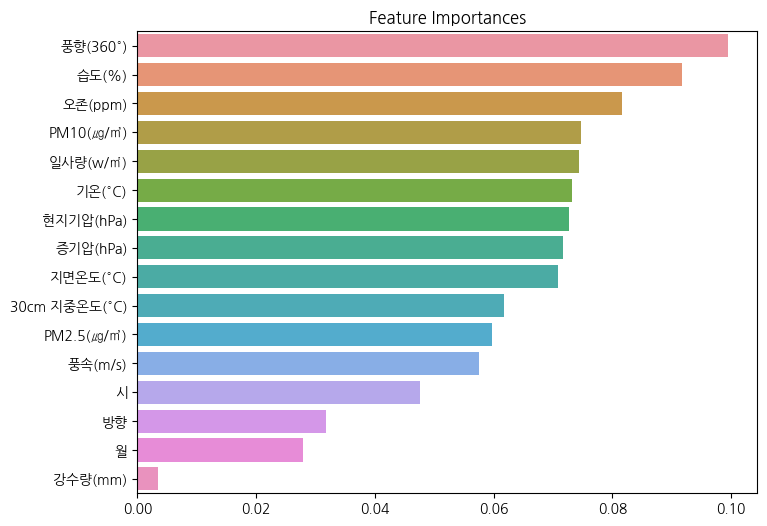

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_features.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [122]:
clf.feature_importances_

array([0.07327874, 0.09165116, 0.0574986 , 0.09944749, 0.07430813,
       0.07471588, 0.05971798, 0.08158679, 0.07175976, 0.07277705,
       0.07078287, 0.06170351, 0.00355633, 0.02792657, 0.04755562,
       0.03173353])

In [139]:
#import joblib #random Forest 모델을 저장
#joblib.dump(clf, './rf.pt')

['./rf.pt']

In [140]:
model = joblib.load('./rf.pt')